# 0. Motivation

Differential equations are relationships between a function and its derivatives. These equations arise when the rate of change is related to the function itself and/or its independent variable(s). Differential equations are fundamental tools for modeling dynamic systems in various engineering and scientific disciplines. Consider a basic example of a car's acceleration in relation to its position. In this case, a simple differential equation emerges, connecting the car's acceleration (the second derivative of position) with its position. 

When working with differential equations, the goal is to find the unknown function that satisfies this relationship between a function and its derivatives. However, in general exact solutions to differential equations are either too difficult to obtain or simply not available. Therefore, numerical solutions are critical to making these equations useful for designing and understanding engineering and scientific systems. 

This section focuses on a specific subset of differential equations: ordinary differential equations (ODEs) with specified initial values, commonly referred to as initial value problems (IVPs). 

By the end of this section, you should be able to:
- Understand the fundamentals of differential equations
- Recognize the practical significance of numerical methods for solving differential equations
- Apply different differential equation solving techniques 
- Implement these methods in Python for real-world applications
- Estimate the accuracy of these numerical approximations

# 1. Differential Equations 

## 1.1. Definition of Differential Equations

In various engineering and scientific disciplines, we encounter two main types of equations: algebraic and differential.

**Algebraic Equations:**
An algebraic equation is limited to basic operations like addition, subtraction, multiplication, and division, often involving polynomials. An example is $f(x) = 2x^2 + 3x - 5 = 0$. Solving an algebraic equation revolves around finding specific values, known as roots, that satisfy $f(x) = 0$. The unknown in this case represents distinct numerical values.

**Differential Equations:**
Conversely, a differential equation relates functions and their derivatives. For example, $f''(x) + 2f'(x) + f(x) = 0$ involves an unknown function and its derivatives. The objective in solving a differential equation is to identify the function(s) that satisfy the differential equation. Unlike algebraic equations, the unknown here isn't a specific value but an entire function, making the solution of a differential equation more challenging.

## 1.2. Types of Differential Equations

There are different types of differential equations: ordinary and partial. While Ordinary Differential Equations (ODEs) focus on a single independent variable, typically time, and describe the behavior of functions in that context, Partial Differential Equations (PDEs) extend this to involve multiple independent variables in multiple dimensions.

**Ordinary Differential Equations (ODEs):**
ODEs are mathematical expressions involving an unknown function and its derivatives with respect to a single independent variable. An example is $f''(x) + 2f'(x) + f(x) = 0$. The independent variable is usually time or a single spatial dimension.

**Partial Differential Equations (PDEs):**
On the other hand, PDEs involve unknown functions and their partial derivatives with respect to several independent variables. An example is $x\dfrac{\partial f(x, t)}{\partial x} + t\dfrac{\partial f(x, t)}{\partial t} - f(x, t) = 0$. PDEs involve considering how the function varies across multiple dimensions (e.g., time and space).

In addition to classifying differential equations based on the number of independent variables, we can distinguish between linear and nonlinear differential equations. We will focus on ODEs hereafter. 

**Linear vs. Nonlinear ODEs:**
An ODE is linear when the unknown function and its derivatives in the equation appear only with a power of one and are multiplied by constants. If the functions and/or derivatives are raised to a power different from one and/or are multiplied by one another, the ODE would be nonlinear.

Examples of linear ODEs:
* $f''(x) + 2f'(x) + f(x) = 0$
* $f''(x) + f(x) + e^x = 0$

Examples of nonlinear ODEs:
* $f''(x) + 2f'(x) + f^2(x) = 0$
* $f''(x) + 2f'(x)f(x) = 0$
* $f'(x) = \cos(f(x))$


## 1.3. Order of Differential Equations

The order of the differential equation is the order of the highest order derivative that appears in the equation. Below are some examples for different orders of differential equations

* First order (the highest order derivative is 1): 
    * $\dfrac{dy}{dt} = 3t + 2$
    * $\dfrac{dy}{dt} = y^2 + 3t + 2$
* Second order (the highest order derivative is 2):
    * $\dfrac{d^2y}{dt^2}+ 2 \dfrac{dy}{dt}+y = 0$
    
## 1.4. Initial Value Problem    

An Initial Value Problem (IVP) is a specific type of differential equation that comes with initial conditions. These initial conditions provide the starting values for the unknown function and its derivatives at a particular point. Solving an IVP involves finding the function that not only satisfies the given differential equation but also aligns with the provided initial conditions.

**General Solution:**
The general solution of a differential equation represents the family of all possible solutions without specifying particular values for any arbitrary constants that may arise during the solving process. For example, in the case of the differential equation $y' = y$, we need to find a function such that its first derivative is equal to the function itself. An obvious solution in this case is $y = C e^t$, where $C$ is some arbitrary constant. This solution is known as a general solution because it involves an arbitrary constant.

**Particular Solution:**
A particular solution, on the other hand, is a specific solution derived from the general solution by assigning particular values to any arbitrary constants present. These values are determined based on additional information, such as initial conditions in an IVP. An example of an initial condition could be a known value of the function at $t=0$. For example, assume we know that $y(t=0)=y_0=5$. We can then substitute the initial condition into the general solution to assign values to the arbitrary constants. For the previous example with $y = C e^t$, and using the initial condition $y_0 = C e^0 \rightarrow C=5$. Hence, the solution that satisfies the given differential equation and the initial condition is $y= 5 e^t$, which is known as the particular solution. 

Next, we will discuss several methods of numerically approximating the solution to initial value problems on a numerical grid. Although initial value problems encompass more than just differential equations in time, we will generally use time as the independent variable. We also use several notations for the unknown function: $f(t)$ and $y$ and several notations for its derivatives: $f^{\prime}(t), f^{(1)}(t), \dfrac{df(t)}{dt}$, and $\dot{f}$, whichever is most convenient for the context.

# 2. Numerical Solutions to First Order ODEs

Let $y'=F(t, y)$ be a first order ODE, where $F$ is a known function that returns the derivative. Numerical methods play a crucial role in solving differential equations, providing approximate solutions when analytical solutions are challenging or unavailable. We will first explore first order ODEs and then discuss solutions to higher order ODEs next. Euler's Method, Midpoint Method, and Heun's Method are three techniques for numerical integration of ODEs. All three methods share a common approach of predicting a future value $y_{i+1}$ using the known current value $y_i$ and a linear approximation: $y_{i+1} = y_i + h \cdot slope$, where $h$ is the step size. The methods differ in how they estimate the $slope$, which influences the accuracy of the predictions.

In essence, the core idea is to use the current information (value and slope) to take a step forward and update the solution. Here's a concise summary:

1. **Euler's Method:** Uses the slope at the current point $(t_i, y_i)$
   

2. **Midpoint Method:** Uses the slope at the midpoint of the interval $(t_{i+1/2}, y_{i+1/2})$
   

3. **Heun's Method:** Uses the average of the slopes at the current point and the predicted point $(t_i, y_i)$ and $(t_{i+1}, y^*_{i+1})$

While all three methods share a common framework of advancing from the current point to predict the next, the nuances in how they estimate the slope influence their accuracy and suitability for different types of differential equations.

Without loss of generality, we assume that we have a known initial condition $(t_0, y_0)$ and are interested in estimating the numerical solution using $N$ steps between an initial time and a final time $[t_0, t_f]$, such that $t_f = t_0 + Nh$.

<br>

<figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vSOPfvz36FaK7TmIPCh8ho7hMqFctk-TJUNnLtxP0WOE5mmPjIHgIsUYOU6-Ywufdff4y3DNPAViYEE/pub?w=961&h=348
" style="width:65%">
    <figcaption style="text-align:center"><strong>Numerical solution time grid</strong></figcaption>   
</figure>

## 2.1. Euler's Method

Euler's Method is a straightforward numerical technique that approximates the solution of a first-order ODE using the slope at the current point $(t_i, y_i)$ (left endpoint of each subinterval). Recall that we have the first order ODE $y'=F(t, y)$, where $F$ is the derivative function. It follows that the slope at the current point is $y'_i = F(t_i, y_i)$. Then, the numerical approximation of the next step using the current value and Euler's method is:

$$y_{i+1} = y_i + h \cdot F(t_i, y_i)$$

The general steps are as follows:

* Set the initial condition: $t_0, y_0$

* Compute $y_{1} = y_0 + h \cdot F(t_0, y_0)$

* Compute $y_{2} = y_1 + h \cdot F(t_1, y_1)$

* Continue the process until the endpoint is reached

#### Variable Description:

* $t$: independent variable (time)
* $y(t)$: dependent variable (solution)
* $F(t, y)$: the derivative function
* $t_0$: initial time
* $y_0$: initial value of $y$
* $t_f$: final time
* $N$: number of steps

<figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vSfayVuvo3vA4yagfqGcKSpa_bz_ypQZlL24y0asGJl-gy0SnPcfGwcO7NgoRTHiTpwMsD2TrmLgvgC/pub?w=1440&h=593
" style="width:65%">
    <figcaption style="text-align:center"><strong>Eluer's method pseudocode</strong></figcaption>   
</figure>

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Write a function <code>my_Euler(F, t0, y0, tf, N)</code> which takes as input a function object <code>F</code> and four scalar values <code>t0, y0, tf, N</code>. The function should return two arrays: the time grid and corresponding numerical solution using Forward Euler's method. The solution should be evaluated at <code>N+1</code> points between <code>[t0, tf]</code>, inclusive. Note that <code>F</code> is a function that returns the first derivative $y'=F(t, y)$.</div>

In [1]:
def my_Euler(F, t0, y0, tf, N):
    t_sol = np.linspace(t0, tf, N+1)
    y_sol = np.zeros(N+1)
    h = (tf - t0) / N
    y_sol[0] = y0
    for i in range(N):
        y_sol[i+1] = y_sol[i] + h * F(t_sol[i], y_sol[i])
    return t_sol, y_sol

Let's consider an example of the cooling of a cup of coffee in a room with an ambient temperature. The rate of change of the coffee's temperature $T$ with respect to time $t$ can be modeled by the first-order ordinary differential equation:

$$\dfrac{dT}{dt} = -k(T - T_{\text{ambient}})$$

where:
- $T$ is the temperature of the coffee,
- $t$ is time,
- $T_{\text{ambient}}$ is the ambient temperature of the room,
- $k$ is a positive constant representing the cooling rate.

Assume $T_{\text{ambient}} = 75^\circ \text{F}$, $T_0 = 200^\circ \text{F}$ (initial temperature of the coffee at $t=0$), and $k = 0.1 \text{ min}^{-1}$ (cooling rate).

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Try your function <code>my_Euler()</code> to find the temperature of the cup of coffee at $t = 30$ min. Try different number of steps. Plot the result and compare it with the analytic solution provided below.</div>

The analytic solution to this differential equation is:

$$T(t) = T_{\text{ambient}} + (T_0 - T_{\text{ambient}})e^{-kt}$$

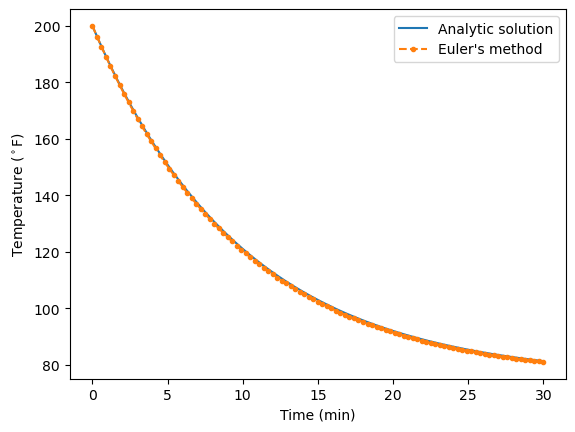

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Given
t0, T0, tf, k, T_amb, N = 0, 200, 30, 0.1, 75, 10**2

# Define y' = F
F = lambda t, T: -k*(T - T_amb)

# Numerical solution
sol = my_Euler(F, t0, T0, tf, N)

# Analytic solution 
T_excat = lambda t: T_amb + (T0 - T_amb) * np.exp(-k*t)
t = np.linspace(t0, tf, 1001)
sol_exact = T_excat(t)

# Plot results
plt.figure()
plt.plot(t, sol_exact, label="Analytic solution")
plt.plot(sol[0], sol[1], '.--', label="Euler's method")
plt.ylabel(r'Temperature ($^\circ$F)')
plt.xlabel('Time (min)')
plt.legend()
plt.show()

## 2.2. Midpoint Method

The Midpoint Method improves the accuracy by considering the slope at midpoint of each subinterval: $(t_{i+1/2}, y_{i+1/2})$. Recall that we have the first order ODE $y'=F(t, y)$, where $F$ is the derivative function. It follows that the slope at the midpoint is $y'_{i+1/2} = F(t_{i+1/2}, y_{i+1/2})$. Then, the numerical approximation of the next step using the current value and Midpoint method is:

$$y_{i+1} = y_i + h \cdot F(t_{i+1/2}, y_{i+1/2})$$

The general steps are as follows:

* Set the initial condition: $t_0, y_0$

* Compute the slope at $t_0$: $F(t_0, y_0)$

* Compute the midpoint (intermediate step): $y_{1/2} = y_0 + \frac{h}{2} \cdot F(t_0, y_0)$

* Compute the slope at the midpoint: $F(t_{1/2}, y_{1/2})$

* Compute $y_{1} = y_0 + h \cdot F(t_{1/2}, y_{1/2})$

* Continue the process until the endpoint is reached

<figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vRHlcOs8-K74zttzo4pI6_vrLMBHZzyFgYrxncAahjqZCFF3qC03jpp4QKdiuwlIu-XZlLZjeB88z1l/pub?w=1440&h=624
" style="width:65%">
    <figcaption style="text-align:center"><strong>Midpoint method pseudocode</strong></figcaption>   
</figure>


## 2.3. Heun's Method

Heun's improves the accuracy by averaging slopes at the current $(t_{i}, y_{i})$ and predicted point $(t_{i+1}, y^*_{i+1})$. Then, the numerical approximation of the next step using the current value and Heun's method is:

$$y_{i+1} = y_i + \dfrac{h}{2} \cdot \left[F(t_{i}, y_{i})+ F(t_{i+1}, y^*_{i+1})\right]$$

The general steps are as follows:

* Set the initial condition: $t_0, y_0$

* Compute the slope at $t_0$: $F(t_0, y_0)$

* Compute the intermediate step (predictor step): $y^*_{1} = y_0 + h \cdot F(t_0, y_0)$

* Compute the slope at the intermediate step: $F(t_{1}, y^*_{1})$

* Compute the final step (corrector step): $y_{1} = y_0 + \frac{h}{2} \cdot [F(t_{0}, y_{0}) + F(t_{1}, y^*_{1})]$

* Continue the process until the endpoint is reached

<figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vSpOm43PmbWNsIotgOKMkHRiJOqwplljLClXqs6-CJpLfzJx2JA6fYRU0dacROYQqVoi7vB4RKLVbOj/pub?w=1439&h=639
" style="width:65%">
    <figcaption style="text-align:center"><strong>Heun's method pseudocode</strong></figcaption>   
</figure>

# 3. System of ODEs

A system of first order ordinary differential equations arises when modeling complex dynamic situations involving multiple interacting functions (i.e., dependent variables). The methods we discussed for solving a single first order ODE can be extended to a system of ODEs. However, this requires rewriting the equations in matrix/vector form. In general, a system of $n$ first order ODEs involving functions $f_1, f_2, ..., f_n$ would be:

\begin{equation}
    \begin{cases}
      f_1' = F_1(t, f_1, f_2, ..., f_n)\\
      f_2' = F_2(t, f_1, f_2, ..., f_n)\\
      ... \\
      f_n' = F_n(t, f_1, f_2, ..., f_n)\\
    \end{cases}       
\end{equation}

Because we have a system of $n$ differential equations, we will have $n$ initial conditions

$$\begin{bmatrix} f_{1, 0} \\ f_{2, 0} \\ \vdots \\ f_{n, 0} \end{bmatrix}$$

The general approach to solve a system of differential equations is discussed next. 
1. **Formulation of the state of the system:** Begin by defining a vector $S$ of all the dependent variables (i.e., unknown functions are trying to solve for). This is referred to as the state of the system. In general, the state of the system would be:

$$S = \begin{bmatrix} f_1 \\ f_2 \\ \vdots \\ f_n \end{bmatrix}$$

2. **Formulation of the system of ODEs:** The system of the differential equations is simply $S'$:

$$S' = \begin{bmatrix} f'_1 \\ f'_2 \\ \vdots \\ f'_n \end{bmatrix} = \begin{bmatrix} F_1(t, f_1, f_2, ..., f_n) \\ F_2(t, f_1, f_2, ..., f_n) \\ \vdots \\ F_n(t, f_1, f_2, ..., f_n) \end{bmatrix}$$

3. **Numerical solution:** We can then apply any of the numerical methods to solve the system. However, keep in mind that we are working with vectors/matrices. For example, Forward Euler's method would be:

$$S_{i+1} = S_i + h S'_i$$

$$\begin{bmatrix} f_{1, i+1} \\ f_{2, i+1} \\ \vdots \\ f_{n, i+1} \end{bmatrix} = \begin{bmatrix} f_{1, i} \\ f_{2, i} \\ \vdots \\ f_{n, i} \end{bmatrix} + h \begin{bmatrix} f'_{1, i} \\ f'_{2, i} \\ \vdots \\ f'_{n, i} \end{bmatrix} = \begin{bmatrix} f_{1, i} \\ f_{2, i} \\ \vdots \\ f_{n, i} \end{bmatrix} + h \begin{bmatrix} F_1(t_i, f_{1, i}, f_{2, i}, ..., f_{n, i}) \\ F_2(t_i, f_{1, i}, f_{2, i}, ..., f_{n, i}) \\ \vdots \\ F_n(t_i, f_{1, i}, f_{2, i}, ..., f_{n, i}) \end{bmatrix}$$

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Write a function <code>my_Euler_system(dS, t0, S0, tf, N)</code> which takes as input a function object <code>dS</code>, three scalar values <code>t0, tf, N</code>, and a NumPy array of the initial conditions <code>S0</code>. The function should return two arrays: a vector of the time grid and corresponding matrix of the numerical solution using Forward Euler's method. The solution should be evaluated at <code>N+1</code> points between <code>[t0, tf]</code>, inclusive. Note that <code>dS</code> is a function that returns a NumPy array of the derivative of state of the system evaluated at step $i$: $S'_i$.</div>

In [3]:
def my_Euler_system(dS, t0, S0, tf, N):
    t_sol = np.linspace(t0, tf, N+1)
    y_sol = np.zeros((len(S0), N+1))
    h = (tf - t0) / N
    y_sol[:, 0] = S0
    for i in range(N):
        y_sol[:, i+1] = y_sol[:, i] + h * dS(t_sol[i], y_sol[:, i])
    return t_sol, y_sol

Let's consider an example of water flow between three connected tanks. If the three water tanks initially have different water heights, the water will flow from the tank with a higher water level to the tanks with lower water levels through the connecting pipes. In a physical system, this is analogous to a fluid flow or hydraulic system. The rate of flow will depend on the difference in water levels between the connected tanks and the properties of the connecting pipes (e.g., diameter, length, etc,). If the difference in water levels is significant, you might observe a noticeable flow, and the water levels in the tanks will tend to equalize over time. In this example, we will assume that the connecting pipe between tanks 1 and 2 is wider than that between tanks 2 and 3, as shown in the illustration below. 

<br>
<figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vSw4tkNXwXmKLBAdmvM_4hoqx6GyzDSMQ98JLCFd73SJlQByEYbvfEndr30xZr64WjdgI7OUftxOpEj/pub?w=1435&h=669
" style="width:50%">
    <figcaption style="text-align:center"><strong>Water flow between three connected tanks</strong></figcaption>   
</figure>

We are interested in estimating the water height in each tank with time. Let $h_1, h_2, h_3$ be the water height at any time $t$ in tanks 1, 2, and 3, respectively. Based on the tank and pipe dimensions, the rate of change of the water height in each tank can be modeled by a system of three first order ordinary differential equations:

\begin{cases}
  \dfrac{dh_1}{dt} = -2h_1 + 2 h_2 \\ \\ \dfrac{dh_2}{dt} = 2h_1 - 3 h_2 + h_3 \\ \\ \dfrac{dh_3}{dt} = h_2 - h_3 
\end{cases}

$$S = \begin{bmatrix} h_1 \\ h_2 \\ h_3 \end{bmatrix} \rightarrow  S' = \begin{bmatrix} -2h_1 + 2 h_2 \\ 2h_1 - 3 h_2 + h_3 \\ h_2 - h_3 \end{bmatrix}$$

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Write a function <code>dS(ti, Si)</code> which takes as input the time at the current step <code>ti</code> and a NumPy array (row vector) of the current state <code>Si</code> based on the above system of ODEs and returns a NumPy array of the derivative of the state of the system evaluated at step $i$. Then, change the initial conditions and see how that affects the numerical solution.</div>

In [4]:
import ipywidgets as widgets  # import ipywidgets package for interactive widgets

# Define function dS
dS = lambda ti, Si: np.array([-2*Si[0] + 2*Si[1],
                             2*Si[0] - 3*Si[1] + Si[2],
                             Si[1] - Si[2]])

# create sliders
@widgets.interact(h1_0=(0, 10, 0.5), h2_0=(0, 10, 0.5), h3_0=(0, 10, 0.5), ti = (0, 2.5, 0.05))

# define a function that takes the values from the sliders and plots the results
def arange(h1_0, h2_0, h3_0, ti):
    
    # Get numerical solution
    sol = my_Euler_system(dS, 0, np.array([h1_0, h2_0, h3_0]), 2.5, 50)
    
    # Get index of selected time
    t_index = int(ti/0.05)
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plot numerical solution
    ax[0].plot(sol[0], sol[1][0], label='Tank 1')
    ax[0].plot(sol[0], sol[1][1], label='Tank 2')
    ax[0].plot(sol[0], sol[1][2], label='Tank 3')
    ax[0].plot(sol[0][t_index], sol[1][0][t_index], 'oC0', clip_on=False)
    ax[0].plot(sol[0][t_index], sol[1][1][t_index], 'oC1', clip_on=False)
    ax[0].plot(sol[0][t_index], sol[1][2][t_index], 'oC2', clip_on=False)
    ax[0].set(ylim=(0,10), ylabel='Water Height (m)', xlim = (0, 2.5), xlabel='Time (hr)')
    ax[0].legend()
    ax[0].set_title("Numerical Solution")
    
    # Tanks Dimensions
    tank_width = 2.99
    tank_height = 10
    
    # Current water heights
    heights = [sol[1][0][t_index], sol[1][1][t_index], sol[1][2][t_index]]

    # Plot each tank
    for i, height in enumerate(heights):
        # Calculate tank coordinates
        tank_x = i*(tank_width+0.5)
        tank_y = 0.01

        # Plot tank outline
        tank_rect = ax[1].vlines([tank_x, tank_x+tank_width], [0], [tank_height]*2,\
                                 linewidth=1, edgecolor='k')
        tank_rect = ax[1].hlines(tank_y, tank_x, tank_x+tank_width, linewidth=1, edgecolor='k')
        
        # Plot water in the tank
        water_height = min(height, tank_height)
        water_rect = plt.Rectangle((tank_x, tank_y), tank_width, water_height, \
                                   linewidth=1, facecolor='lightblue')
        ax[1].add_patch(water_rect)

    # Connect tanks with pipes at the bottom
    pipe_rect = plt.Rectangle((tank_width-0.02, 0.04), 0.58, 0.4, linewidth=1, \
                              facecolor='lightblue', zorder=2)
    ax[1].add_patch(pipe_rect) 
    pipe_rect = plt.Rectangle((tank_width*2+0.5-0.02, 0.04), 0.58, 0.2, linewidth=1, \
                              facecolor='lightblue', zorder=2)
    ax[1].add_patch(pipe_rect) 
        
    # Remove axis labels and ticks
    ax[1].set(ylim=(0,10), xlim=(0, 10))
    ax[1].set_xticks([])
    ax[1].set_yticks([])

    # Set title
    ax[1].set_title(f"Water Heights at t = {ti} hr")

    # Remove axes border
    ax[1].axis('off')

    # Display the plot
    plt.show()

    return

interactive(children=(FloatSlider(value=5.0, description='h1_0', max=10.0, step=0.5), FloatSlider(value=5.0, d…

When we have a system of **linear** ODEs,  we can derive a more elegant formulation using a matrix $A$ such that $A\cdot S_i = S'_i$

Then, Forward Euler's equation can be written in matrix form as:

$$S_{i+1} = S_i + h S'_i = S_i + h A S_i = (I_{n\times n} + hA_{n\times n}) \cdot S_i $$

where $I$ is the identity matrix.

<div class="alert alert-block alert-danger"> <b>TRY IT!</b> Write a function <code>my_Euler_system_lin(A, t0, S0, tf, N)</code> which takes as input an array <code>A</code>, where $S'=A\cdot S$, three scalar values <code>t0, tf, N</code>, and a list of the initial conditions <code>S0</code>. The function should return two arrays: a vector of the time grid and corresponding matrix of the numerical solution using Forward Euler's method. The solution should be evaluated at <code>N+1</code> points between <code>[t0, tf]</code>, inclusive.</div>

In [5]:
def my_Euler_system_lin(A, t0, S0, tf, N):
    t_sol = np.linspace(t0, tf, N+1)
    y_sol = np.zeros((len(S0), N+1))
    h = (tf - t0) / N
    y_sol[:, 0] = S0
    for i in range(N):
        y_sol[:, i+1] = (np.eye(len(S0)) + h * A) @ y_sol[:, i]
    return t_sol, y_sol

The tanks example is a system of linear ODEs, so let's obtain a numerical solution using the above formulation.  Recall that:

$$S = \begin{bmatrix} h_1 \\ h_2 \\ h_3 \end{bmatrix} \rightarrow  S' = \begin{bmatrix} -2h_1 + 2 h_2 \\ 2h_1 - 3 h_2 + h_3 \\ h_2 - h_3 \end{bmatrix}$$

So first, we need to find a matrix A such that:

$$A\cdot S = S'\rightarrow A \begin{bmatrix} h_1 \\ h_2 \\ h_3 \end{bmatrix} = \begin{bmatrix} -2h_1 + 2 h_2 \\ 2h_1 - 3 h_2 + h_3 \\ h_2 - h_3 \end{bmatrix}$$

<div class="alert alert-block alert-danger"> <b>TRY IT!</b> Define matrix <code>A</code> for the above system of ODEs. Then, change the initial conditions and see how that affects the numerical solution.</div>

In [6]:
# Define matrix A
A = np.array([[-2, 2, 0],
              [2, -3, 1],
              [0, 1, -1]])

# create sliders
@widgets.interact(h1_0=(0, 10, 0.5), h2_0=(0, 10, 0.5), h3_0=(0, 10, 0.5), ti = (0, 2.5, 0.05))

# define a function that takes the values from the sliders and plots the results
def arange(h1_0, h2_0, h3_0, ti):
    
    # Get numerical solution
    sol = my_Euler_system_lin(A, 0, np.array([h1_0, h2_0, h3_0]), 2.5, 50)
    
    # Get index of selected time
    t_index = int(ti/0.05)
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plot numerical solution
    ax[0].plot(sol[0], sol[1][0], label='Tank 1')
    ax[0].plot(sol[0], sol[1][1], label='Tank 2')
    ax[0].plot(sol[0], sol[1][2], label='Tank 3')
    ax[0].plot(sol[0][t_index], sol[1][0][t_index], 'oC0', clip_on=False)
    ax[0].plot(sol[0][t_index], sol[1][1][t_index], 'oC1', clip_on=False)
    ax[0].plot(sol[0][t_index], sol[1][2][t_index], 'oC2', clip_on=False)
    ax[0].set(ylim=(0,10), ylabel='Water Height (m)', xlim = (0, 2.5), xlabel='Time (hr)')
    ax[0].legend()
    ax[0].set_title("Numerical Solution")
    
    # Tanks Dimensions
    tank_width = 2.99
    tank_height = 10
    
    # Current water heights
    heights = [sol[1][0][t_index], sol[1][1][t_index], sol[1][2][t_index]]

    # Plot each tank
    for i, height in enumerate(heights):
        # Calculate tank coordinates
        tank_x = i*(tank_width+0.5)
        tank_y = 0.01

        # Plot tank outline
        tank_rect = ax[1].vlines([tank_x, tank_x+tank_width], [0], [tank_height]*2, \
                                 linewidth=1, edgecolor='k')
        tank_rect = ax[1].hlines(tank_y, tank_x, tank_x+tank_width, linewidth=1, edgecolor='k')
        
        # Plot water in the tank
        water_height = min(height, tank_height)
        water_rect = plt.Rectangle((tank_x, tank_y), tank_width, water_height, linewidth=1, \
                                   facecolor='lightblue')
        ax[1].add_patch(water_rect)

    # Connect tanks with pipes at the bottom
    pipe_rect = plt.Rectangle((tank_width-0.02, 0.04), 0.58, 0.4, linewidth=1, \
                              facecolor='lightblue', zorder=2)
    ax[1].add_patch(pipe_rect) 
    pipe_rect = plt.Rectangle((tank_width*2+0.5-0.02, 0.04), 0.58, 0.2, linewidth=1, \
                              facecolor='lightblue', zorder=2)
    ax[1].add_patch(pipe_rect) 
        
    # Remove axis labels and ticks
    ax[1].set(ylim=(0,10), xlim=(0, 10))
    ax[1].set_xticks([])
    ax[1].set_yticks([])

    # Set title
    ax[1].set_title(f"Water Heights at t = {ti} hr")

    # Remove axes border
    ax[1].axis('off')

    # Display the plot
    plt.show()

    return

interactive(children=(FloatSlider(value=5.0, description='h1_0', max=10.0, step=0.5), FloatSlider(value=5.0, d…

# 4. Order Reduction 

Many numerical methods for solving initial value problems are designed specifically to solve first order differential equations. To make these solvers useful for solving higher order differential equations, we must often reduce the order of the differential equation to first order. Specifically, we will turn an **$n^{th}$ order ODE** into a **system of $n$ first order ODEs**.

The general approach to solve a higher order ODE is discussed next. 
1. **Rearrange the ODE:** Begin by rearranging the $n^{th}$ order ODE such that the $n^{th}$ order derivative is written as a function of the independent variable, the unknown function, and its derivatives::

$$y^{(n)} = F\left(t, y, y', ..., y^{(n-1)}\right)$$

2. **Introduce new functions:** We will then define new functions that replace the unknown function and its higher order derivatives:

$$S = \begin{bmatrix} S_1 \\ S_2 \\ \vdots \\ S_n \end{bmatrix} = \begin{bmatrix} y \\ y' \\ \vdots \\ y^{(n-1)} \end{bmatrix}$$

By using these new functions $S_1, S_2, ..., S_n$, we "got rid of" the derivatives $y', ..., y^{(n-1)}$ and replaced them with regular functions.

$$y^{(n)} = F\left(t, y, y', ..., y^{(n-1)}\right) \rightarrow y^{(n)} = F\left(t, S_1, S_2, ..., S_n\right)$$

3. **Take the derivative of $S$:** By taking the derivative of this new vector of functions, we will obtain a system of $n$, first order ODEs:

$$S' = \begin{bmatrix} S'_1 \\ S'_2 \\ \vdots \\ S'_n \end{bmatrix} = \begin{bmatrix} y' \\ y'' \\ \vdots \\ y^{(n)} \end{bmatrix} = \begin{bmatrix} S_2 \\ S_3 \\ \vdots \\ F\left(t, S_1, S_2, ..., S_n\right) \end{bmatrix} \rightarrow \begin{cases}
      S_1' = S_2\\
      S_2' = S_3\\
      ... \\
      S_n' = F\left(t, S_1, S_2, ..., S_n\right)\\
    \end{cases}       $$

4. **Numerical solution:** We can then apply any of the numerical methods to solve the system. However, keep in mind that we are working with vectors/matrices. For example, Forward Euler's method would be:


$$S_{i+1} = S_i + h S'_i$$

$$\begin{bmatrix} y_{i+1} \\ y'_{i+1} \\ \vdots \\ y^{(n-1)}_{i+1} \end{bmatrix} = \begin{bmatrix} y_{i} \\ y'_{i} \\ \vdots \\ y^{(n-1)}_{i} \end{bmatrix} + h \begin{bmatrix} y'_{i} \\ y''_{i} \\ \vdots \\ F\left(t_i, y_i, y_i', ..., y_i^{(n-1)}\right) \end{bmatrix}$$

If the $n^{th}$ order ODE is linear, then we can rewrite the solution more elegantly using linear algebra.

# 5. Runge Kutta Methods

**Runge Kutta** (RK) methods are one of the most widely used methods for solving ODEs. Recall that Euler's method evaluates the slope the the left endpoint of each subinterval whereas Heun's method takes the average of the slopes at the left and right endpoints.

We can greatly improve the accuracy of numerical integration be evaluating the slop at more points over each subinterval. 

Runge Kutta methods are a family of methods, and the most widely used is the **Fourth Order Runge Kutta** (RK4) method. The slope is evaluated at four points between over each subinterval and then a weighted average is taken to finally predict $y_{i+1}$ using $y_i$.

The slopes are $k_1, k_2, k_3$, and $k_4$ and are computed as follows.

$$
\begin{eqnarray*}
k_1 & = & F(t_i,y_i)\\
k_2 & = & F\left(t_i+\frac{h}{2},y_i+\frac{1}{2}k_1h\right)\\
k_3 & = & F\left(t_i+\frac{h}{2},y_i+\frac{1}{2}k_2h\right)\\
k_4 & = & F(t_i+h,y_i+k_3h)
\end{eqnarray*}
$$

Finally, the next step is predicted as:

$$
y_{i+1} = y_i + \frac{h}{6}\left(k_1 + 2k_2 + 2k_3 + k_4\right)
$$
